In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
from IPython.display import display
device = torch.device('cpu')

################################################
## Specify openmojilayers directory
################################################
work_dir = "./openmojilayers/"

################################################
## Describing the model attributes architecture
################################################
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
resnext50_32x4d.fc = nn.Linear(2048, 40)
ct = 0
for child in resnext50_32x4d.children():
    ct += 1
    if ct < 6:
        for param in child.parameters():
            param.requires_grad = False

resnext50_32x4d.to(device)

# Loading the checkpoint of the model that gave highest accuracy for the validation test data set.
path_toLoad = "./3_epoch.pt"
checkpoint = torch.load(path_toLoad, map_location=device)

# Initializing the model with the model parameters of the checkpoint.
resnext50_32x4d.load_state_dict(checkpoint['model_state_dict'])
# Setting the model to be in evaluation mode. This will set the batch normalization parameters.
resnext50_32x4d.eval()
################################################


################################################
## Describing the color model architecture
################################################
resnext50_32x4d_color = models.resnext50_32x4d(pretrained=True)
resnext50_32x4d_color.fc = nn.Linear(2048, 5)


resnext50_32x4d_color.to(device)

# Loading the checkpoint of the model that gave highest accuracy for the validation test data set.
path_toLoad = "./9_epoch-5.pt"
checkpoint = torch.load(path_toLoad, map_location=device)

# Initializing the model with the model parameters of the checkpoint.
resnext50_32x4d_color.load_state_dict(checkpoint['model_state_dict'])
# Setting the model to be in evaluation mode. This will set the batch normalization parameters.
resnext50_32x4d_color.eval()
################################################
print("################################################")
print("##########     models read to use     ##########")
print("################################################")

C:\Users\amiel.go\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\amiel.go\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


################################################
##########     models read to use     ##########
################################################


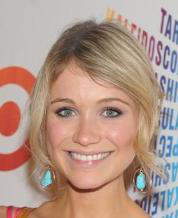

The positive attributes are: ['Arched_Eyebrows', 'Attractive', 'Blond_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open', 'No_Beard', 'Oval_Face', 'Smiling', 'Wearing_Earrings', 'Wearing_Lipstick', 'Young']
skin tone type: 2


In [14]:
################################################
## Load and preprocess the image
################################################

image_path = "./img_align_celeba/017980.jpg"
image = Image.open(image_path).convert('RGB')
preprocess = transforms.Compose([
    #transforms.Resize(218),
    #transforms.CenterzoomCrop(178),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)
################################################


################################################
## Pass the image through the attributes model
################################################
with torch.no_grad():
    output = resnext50_32x4d(input_batch)

# Get the predicted attributes
predicted_attributes = output.squeeze().tolist()

# Display the image
display(image)
#image.show()

# Display the predicted attributes at indices 1 and -1
predicted_attributes 
predicted_attributes_new = [1 if num > 0 else -1 for num in predicted_attributes]




labels = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
# Iterate over the labels and check if the corresponding attribute in transformed_a is 1
positive_attributes = [label for label, value in zip(labels, predicted_attributes_new) if value == 1]
neg_attributes = [label for label, value in zip(labels, predicted_attributes_new) if value == -1]
print(f"The positive attributes are: {positive_attributes}")


################################################
## Pass the image through the skin tone model
################################################
with torch.no_grad():
    output = resnext50_32x4d_color(input_batch)

# Get the predicted attributes
predicted_attributes = output.squeeze().tolist()


colors_part = predicted_attributes

max_index = colors_part.index(max(colors_part))

labels = ['Type2', 'Type3', 'Type4', 'Type5', 'Type6']

print(f"skin tone type: {max_index+2}")



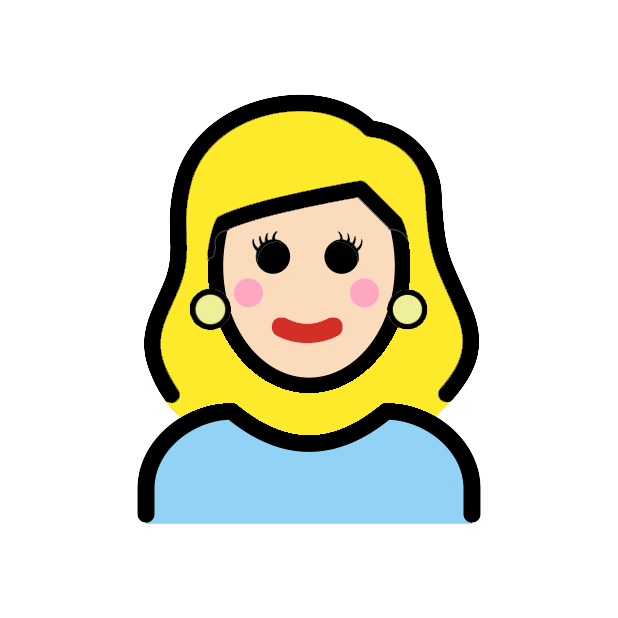

In [16]:
from PIL import Image
from IPython.display import display


################################################
## skin tone
################################################
skin_pic = work_dir + "type"+str(max_index+2)+".png"

face_image = Image.open(skin_pic)

# Create a new image with transparency
result_image = Image.new("RGBA", face_image.size)

# Paste the face skin tone image on the new image
result_image.paste(face_image, (0, 0), face_image)

################################################
## gender
################################################
gender = predicted_attributes_new[20]

################################################
## hair color
################################################

hair_color = 'brown'  # Default case

if predicted_attributes_new[9] == 1:
    hair_color = 'blond'
elif predicted_attributes_new[8] == 1:
    hair_color = 'black'
elif predicted_attributes_new[17] == 1:
    hair_color = 'gray'


################################################
## hair cut type 
################################################    
hair_cut = "_straight_hair"

if predicted_attributes_new[33] == 1:
    hair_cut = "_wavy_hair"
    
    
if gender == 1:
    if (predicted_attributes_new[30] == 1 or predicted_attributes_new[28] == 1):
        hair_cut = "_receding_hair"
  
    
if (gender == 1):
    hair_mask = work_dir + "man_" + hair_color + hair_cut + ".png"
    hair_image = Image.open(hair_mask)
    if predicted_attributes_new[24] == -1:
        beard_mask = work_dir + hair_color + "_beard.png" #default beard
        
        if predicted_attributes_new[16] == 1:   #gotee
            beard_mask =work_dir + hair_color + "_goatee.png"
            
        if predicted_attributes_new[2] == 1:   #mustache
            beard_mask = work_dir + hair_color + "_mustage.png"
        
        if predicted_attributes_new[0] == 1:
            beard_mask = work_dir + "5_o_clock_shadow.png"
            
        beard_image= Image.open(beard_mask)
        
        
    
else:
    hair_mask = work_dir + hair_color + hair_cut + ".png"
    hair_image = Image.open(hair_mask)

# Paste the hair image on the new image with transparency
if predicted_attributes_new[4] != 1:     #if not bald
    result_image.paste(hair_image, (0, 0), hair_image)

if gender == 1 and predicted_attributes_new[24] == -1:
    result_image.paste(beard_image, (0, 0), beard_image)
    
    
    
################################################
## face features 
################################################    

#lipstick
if predicted_attributes_new[36] == 1:
    lipstick_mask = work_dir + "lipstick.png"
    lipstick_image = Image.open(lipstick_mask)
    result_image.paste(lipstick_image, (0, 0), lipstick_image)
    
#Rosy_Cheeks
if predicted_attributes_new[29] == 1:
    rosy_cheeks_mask = work_dir + "rosy_cheeks.png"
    rosy_cheeks_image = Image.open(rosy_cheeks_mask)
    result_image.paste(rosy_cheeks_image, (0, 0), rosy_cheeks_image)
    
#heavy makeup
if predicted_attributes_new[18] == 1:
    heavy_makeup_mask = work_dir + "heavy_makeup.png"
    heavy_makeup_image = Image.open(heavy_makeup_mask)
    result_image.paste(heavy_makeup_image, (0, 0), heavy_makeup_image)

#wearing earrings
if predicted_attributes_new[34] == 1:
    earrings_mask = work_dir + "earrings.png"
    earrings_image = Image.open(earrings_mask)
    result_image.paste(earrings_image, (0, 0), earrings_image)

#wearing hat
if predicted_attributes_new[35] == 1:
    hat_mask = work_dir + "hat.png"
    hat_image = Image.open(hat_mask)
    result_image.paste(hat_image, (0, 0), hat_image)   
    
#bags under eyes
if predicted_attributes_new[3] == 1:
    bags_under_eyes_mask = work_dir + "bags_under_eyes.png"
    bags_under_eyes_image = Image.open(bags_under_eyes_mask)
    result_image.paste(bags_under_eyes_image, (0, 0), bags_under_eyes_image)

#Eyeglasses
if predicted_attributes_new[15] == 1:
    eyeglasses_mask = work_dir + "eyeglasses.png"
    eyeglasses_image = Image.open(eyeglasses_mask)
    result_image.paste(eyeglasses_image, (0, 0), eyeglasses_image)
    

   
    
# Save the resulting image
#result_image.save("result.png")

# Display the resulting image
display(result_image)
